In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [2]:
print(path)

C:\Users\Shwetansh Singh\.fastai\data\oxford-iiit-pet\images


In [3]:
files = get_image_files(path)

In [4]:
# type(files)

fastcore.foundation.L

In [5]:
def is_cat(x):
    return x[0].isupper()

# len(files)

7390

In [8]:
# torch.cuda.device_count()
# torch.cuda.current_device()
# torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [9]:
dls = ImageDataLoaders.from_name_func(path,files,label_func = is_cat, valid_pct = 0.2, seed = 69, item_tfms = Resize(256, method = 'pad'), num_workers = 4)

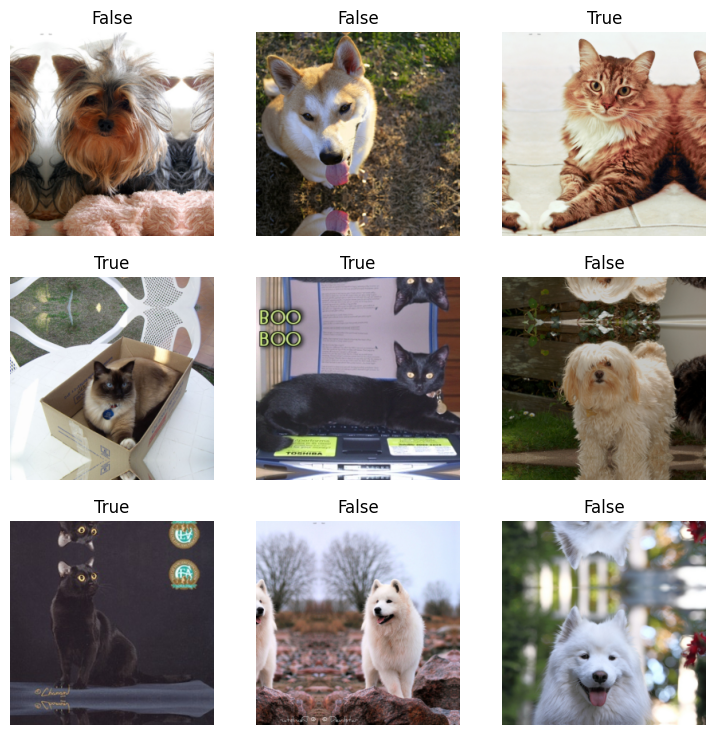

In [10]:
dls.show_batch()

C:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0004786300996784121)

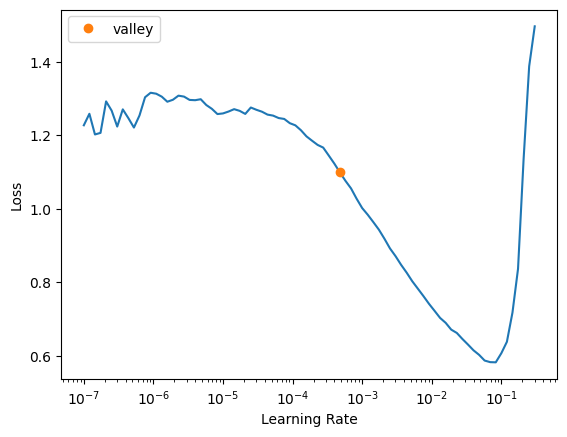

In [11]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.lr_find()

In [12]:
learn.fine_tune(3,8e-3)
learn.validate()

(#2) [0.02123335562646389,0.0067658997140824795]

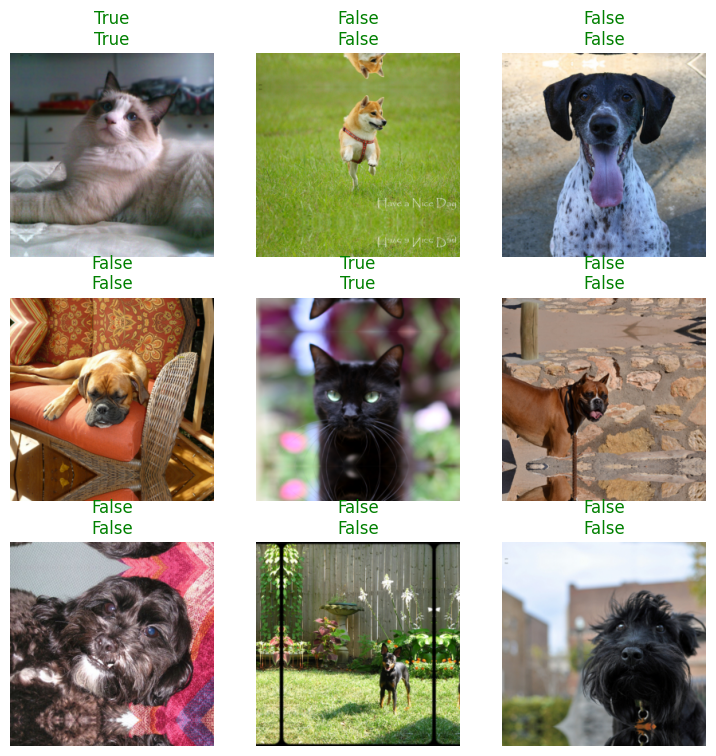

In [13]:
learn.show_results()

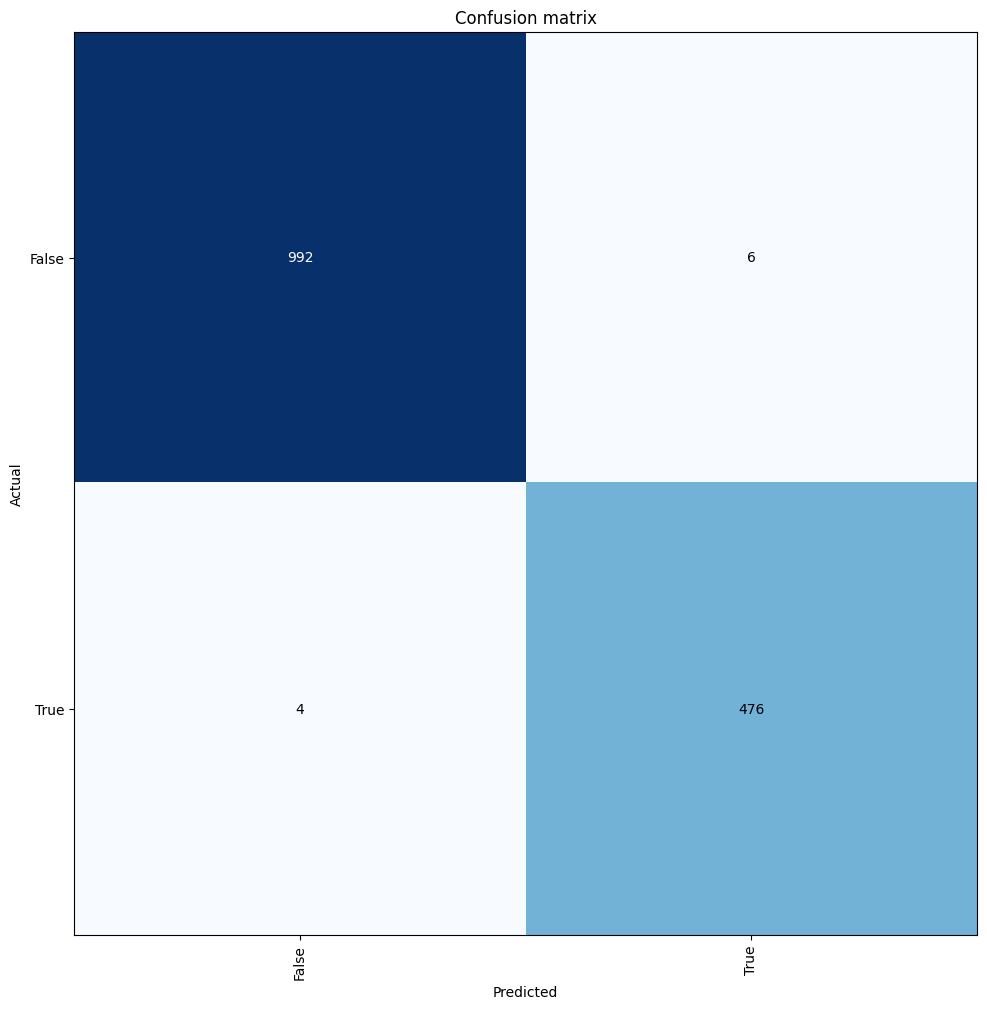

In [14]:
mat = ClassificationInterpretation.from_learner(learn)
mat.plot_confusion_matrix(figsize = (10,10))

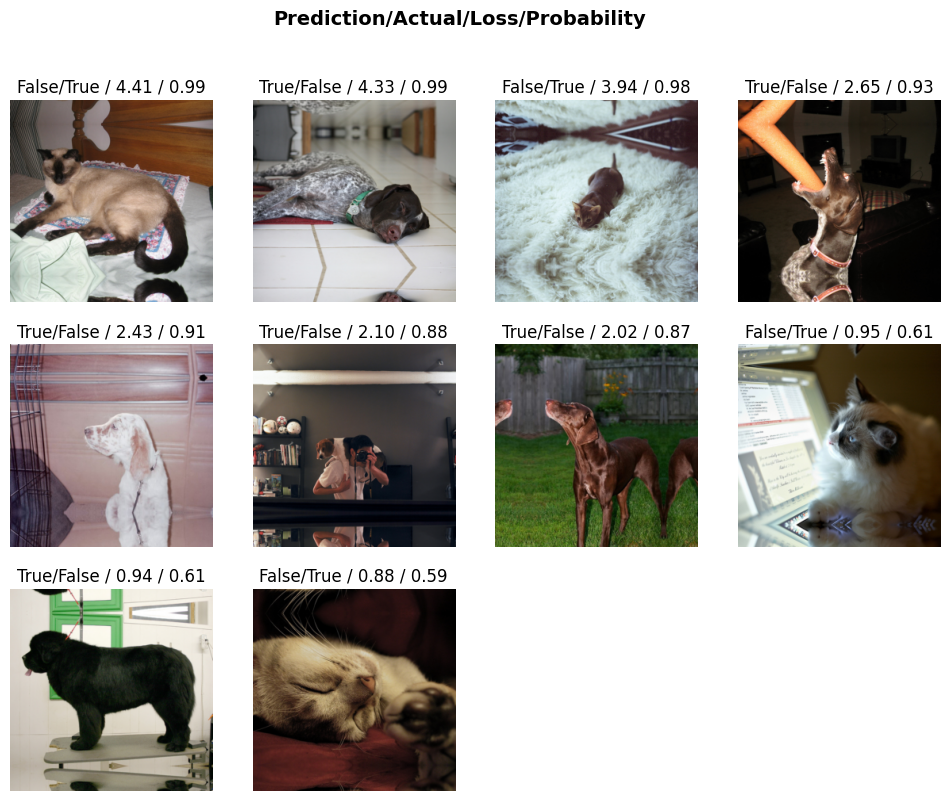

In [15]:
mat.plot_top_losses(10,nrows=3)

In [17]:
# learn.export("catdog_model")

The above code doesn't work for some reason. Trying dill library below

In [19]:
# ! pip3 install dill

                                              0.0/110.5 kB ? eta -:--:--
     ----------                            30.7/110.5 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 110.5/110.5 kB 1.6 MB/s eta 0:00:00


In [20]:
import dill
with open('catdog_model.pkl','wb') as f:
    dill.dump(learn,f)

To check if pkl file of model is actually created

In [23]:
path = Path()
# print(path)
path.ls(file_exts = '.pkl')

(#1) [Path('catdog_model.pkl')]

In [4]:
regExp = r'^(.*)_\d+.jpg'

In [8]:
dls = ImageDataLoaders.from_name_re(path,files, pat = regExp, item_tfms = RandomResizedCrop(460,min_scale=0.7),batch_tfms = aug_transforms(mult = 1.5),num_workers = 3, device = 'cuda',bs=32)
dls.show_batch()

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [7]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.lr_find()

RuntimeError: Exception occured in `TrainEvalCallback` when calling event `before_fit`:
	CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
